In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('Travel.csv')

In [3]:
num_col=[fea for fea in data.columns if (data[fea].dtype !='O' and data[fea].dtype !=int)]
#segregating categorical and numerical variables 
num_col

['Age',
 'DurationOfPitch',
 'NumberOfFollowups',
 'PreferredPropertyStar',
 'NumberOfTrips',
 'NumberOfChildrenVisiting',
 'MonthlyIncome']

In [4]:
X=data[num_col]
X['MonthlyIncome'].sum()

109950418.0

In [5]:
# Performing Mean Imputation

for var in num_col:
    value=X[var].mean()
    X[var]=X[var].fillna(value)

<AxesSubplot:>

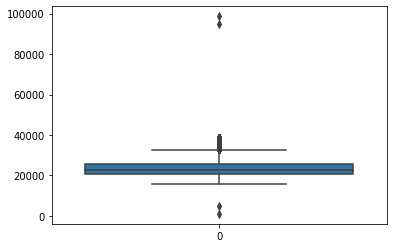

In [6]:
sns.boxplot(X['MonthlyIncome']) # Taking Monthly Income as the variable


Method 1: Replacing Outliers in the dataset with threshold values or Winorization

In [7]:
def find_boundaries(df,variable):
    
    IQR=df[variable].quantile(0.75)-df[variable].quantile(0.25)
    lower_boundary=df[variable].quantile(0.25)-(IQR*1.5)
    upper_boundary=df[variable].quantile(0.75)+(IQR*1.5)
    return upper_boundary,lower_boundary
    

In [8]:
def replace_with_threshold(df,var):
    for variable in num_col:
        upper_boundary,lower_boundary=find_boundaries(df,variable)
        data.loc[data[variable]<lower_boundary,variable]=lower_boundary
        data.loc[data[variable]>upper_boundary,variable]=upper_boundary
        

In [9]:
MonthlyIncome_upper_limit,MonthlyIncome_lower_limit=find_boundaries(X,'MonthlyIncome')

In [10]:
MonthlyIncome_upper_limit,MonthlyIncome_lower_limit

(32834.375, 13075.375)

In [11]:
replace_with_threshold(X,'MonthlyIncome')

In [12]:
X['MonthlyIncome'].sum()

115453843.86337271

Method 2: Trimming outliers from data set

Here we remove outliers completely

In [14]:
outliers_MonthlyIncome = np.where(X['MonthlyIncome'] > MonthlyIncome_upper_limit, True,
                       np.where(X['MonthlyIncome'] < MonthlyIncome_lower_limit, True, False))

In [27]:
X_trimmed = X.loc[~outliers_MonthlyIncome] # deleting Outliers

X.shape, X_trimmed.shape


((4888, 7), (4513, 7))

<AxesSubplot:ylabel='MonthlyIncome'>

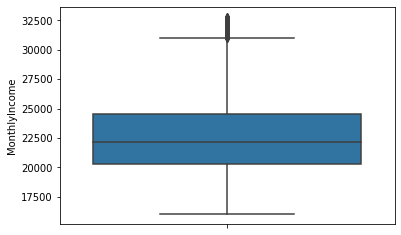

In [16]:
sns.boxplot(y=X_trimmed['MonthlyIncome'])